# 準備

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, norm, poisson, expon
import japanize_matplotlib

## プログラミング環境の構築

### Anacondaのインストール

- Anacondaのアンインストール（環境再構築の場合）
  - コントロールパネル > プログラムのアンインストール
  - Anacondaを選択してアンインストール
  - PC再起動
- インストーラのダウンロード
  - [Anaconda Distribution](https://www.anaconda.com/download) にアクセス
  - メールアドレスを入力して，届いたメールのURLを開く
  - Anacondaをダウンロード
- Cドライブ直下（ユーザフォルダと同じ階層）に`anaconda3`というフォルダを作っておく
- Anacondaのインストール
  - Select Installation TypeでJust Meを選ぶ
  - Choose Install LocationでCドライブ直下に作ったanaconda3フォルダを選ぶ
    - anacondaのインストール先のパスに日本語が含まれるとうまくいかないため
  - Advanced Installation Optionsで以下の2つに必ずチェックを入れる
    - Add Anaconda3 to my PATH environment variable
    - Register Anaconda3 as my default Python 3.9
- Anaconda Navigatorを起動して，インストールが成功しているか確認する（適宜アップデートする）

### 作業フォルダの作成

データ分析では，様々なファイルを扱わなければならない．
例えば，本講義では，Pythonのソースコード（`.py`），Jupyter NoteBook（`.ipynb`），データ（`.csv`），図（`.pdf`や`.png`）などのファイルを扱うことになる．
これらのファイルが自分のPC内のどこに保存されているかを把握しておかないと，ファイルを探すだけで時間を取られてしまう．
データ分析を始める際にまず行うべきことは，PC内のフォルダやファイルを整理することである．

まず本講義専用の作業フォルダを作成する．
名前は自分で分かれば何でも良いが，なるべく半角英数字とし，スペースは絶対に入れないこと．
作業フォルダの作成場所はできればクラウドストレージのフォルダ（OneDriveやGoogle Drive）の中に作ることを推奨する（こうすれば，自動的にクラウド上にバックアップされる）．

ここでは，`ローカルディスク（C:）>Users>username>OneDrive`の中に`modeling_simulation`という作業フォルダを作ったとする：

```
[OneDrive]
    - [デスクトップ]
    - [ドキュメント]
    ...
    - [modeling_simulation]

```

本講義で扱うファイルは全てこの`modeling_simulation`の中に保存することを想定する．
`work`フォルダの中身は次のように章ごとのサブフォルダやレポート用のフォルダに分けておくと良い：
```
[modeling_simulation]
    - [1_introduction]
    - [2_environment]
        - 2_environment.ipynb
    - [report]
    - [others]
```

### Jupyter Lab

本講義ノートは`.ipynb`ファイル形式でダウンロードしてJupyter上で実行可能である．
Jupyterの環境構築の方法はいくつかあるので自分の好きな方法を選んで良いが，Anacondaをインストールすると，自動的にJupyter NotebookとJupyter Labが使えるようになる．

**Jupyter Labの起動**

- Anaconda Navigatorを起動
    - ［スタートメニュー］→［すべてのアプリ］→ [Anaconda3(64-bit)] →［Anaconda Navigator］
- ［Jupyter Lab］をLaunch

**ノートブック（.ipynbファイル）の起動**

- `.ipynb`ファイルをダウンロードし，作業フォルダに保存する．
    - 講義ノート上部のアイコンから`.ipynb`をクリック
    - 自動保存された場合は`ダウンロード`フォルダ内に保存される
- Jupyter Labを起動し，左上のフォルダアイコンをクリックする．
- .ipynbファイルを保存した作業フォルダに移動し，`.ipynb`ファイルをダブルクリックする．

### パス（Path）について

#### パスとは何か？
Pythonプログラムの実行，自分のPC上のファイルの読み込み，加工したデータの保存を行うには，対象となるファイルの在り処，つまりアドレスが分からないといけない．
このアドレスを指定する文字列のことをパス（Path）と呼ぶ．
Windowsの場合，パスはフォルダの階層構造を区切り文字`¥`（またはバックスラッシュ`\`）によって区切った形式で以下のように表される：

```
C:¥Users¥narizuka¥Documents
```

フォルダの階層の区切りは`¥`（またはバックスラッシュ`\\`）によって表されており，`¥`の隣にはフォルダの名前が記載されている．
上の例は，Cドライブ（`C:`）の`Users`フォルダの中の`narizuka`フォルダにある`Documents`フォルダのパスを表す．

#### 絶対パスと相対パス
パスには絶対パスと相対パスの2種類が存在する．
パスを使用する場面の具体例として，matplotlibで描画した図を指定したフォルダ内に保存する場合を考える．
まず，以下のプログラムを実行する．

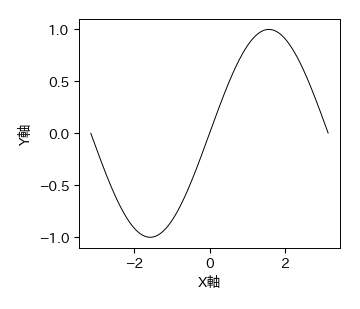

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3.5, 3))
x = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x, np.sin(x))
ax.set_xlabel('X軸'); ax.set_ylabel('Y軸');

実行がうまくいけば，サイン関数が出力されるはずである．
出力された図を自分の作業フォルダに保存するには，`fig.savefig(path)`のように保存先のパスを指定すれば良い．
このとき，パスの指定方法には以下の２つの方法が存在する．

#### 1. 絶対パスによる指定

In [3]:
fig.savefig(r"C:\Users\narizuka\OneDrive\modeling_simulation\2_environment\graph.pdf")

この方法では，最も上の階層であるドライブ名（ここではCドライブ）から始まるパスを指定しており，これを**絶対パス**と呼ぶ．
Windowsで絶対パスを取得するには，パスをコピーしたいファイルやフォルダを右クリックし，「パスのコピー」を選択すれば良い．
絶対パスを使っておけばエラーは出にくいが，PCの奥深くにあるフォルダだとパスが長くなるという問題がある．

なお，Windows環境においてパスをコピーして貼り付けると区切り文字がバックスラッシュ`\`または`¥`になるはずである．
ところが，pythonではバックスラッシュ`\`と文字を組み合わせたエスケープシーケンスいう特別な文字列が存在し，例えば，`\n`は改行，`\t`はタブを表すエスケープシーケンスとなる．
これにより，上の例の中にある`\t`の部分はパスの区切りではなくエスケープシーケンスとして認識され，エラーが出ることがある（特に，pythonでファイルの入出力を行うとき）．
これを回避するにはパスの先頭に`r`を付ける．
これは，raw文字列と呼ばれ，""の中に指定した文字列をそのままの形で認識させることができる．

#### 2. 相対パスによる指定

In [4]:
fig.savefig("./graph2.pdf")

2つ目の方法では，パスが`'.'`から始まっているが，これは現在の居場所（**カレントディレクトリ**と呼ぶ）のパスを意味する．
デフォルトではカレントディレクトリは`.ipynb`ファイルが保存されているフォルダとなる．
このように，カレントディレクトリのパス`'.'`から始まるパスを**相対パス**と呼ぶ．
カレントディレクトリは以下のコマンドにより任意のフォルダに変更することができる．

```python
import os
os.chdir(path)
```

相対パスを用いると，パスが短くなるので便利であるが，カレントディレクトリがどこなのかを認識しておく必要がある．

### JupyterとPythonスクリプトの使い分け

Jupyterは短いコードを逐次実行しながら結果を確認するのには適しているが，コードが長くなると分かりにくくなる．
そこで，コードが長くなってきたら関数やクラスに適宜まとめてスクリプト（`.py`ファイル）に保存すると良い．
`.py`ファイルを編集するにはVSCodeなどのエディタを使用する．
最近のエディタは`.py`ファイルを実行する機能を備えている．
また，保存したスクリプトはNumPyやPandasと同じようにimportできるので，Jupyter上ではimportしたスクリプト内の関数を実行するだけにすると結果が整理しやすい．

## Pythonの基礎知識

### データ（csvファイル）の読み込み

`.csv`形式のデータを読み込むには`pandas`ライブラリの`pd.read_csv()`関数を使用する．
以下の例は，カレントディレクトリ内の`data.csv`ファイルを読み込む例である．

```python
import pandas as pd
df = pd.read_csv('./data.csv', options)
```
第１引数には読み込むファイルのパス，第２引数以降には読み込む際のオプションを指定する．


例として，[Iris dataset](https://drive.google.com/uc?export=download&id=1Y0A04s0klZiUZWWabH3ozUTgXE63Az5j)を読み込む．
Iris datasetはアヤメの花のデータセットであり，アヤメの種類（setosa, versicolor, virginica）ごとにがく片（sepal）と花弁（petal）の長さと幅が記録されている．
- 出典：Ronald A Fisher. The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2):179–188, 1936.

In [37]:
# 相対パスを指定してcsvファイルをDataFrameに読み込む
df = pd.read_csv('./iris_dataset.csv',
                 header=0,      # 第0行目を列ラベルとする
                 index_col=0,   # 第0列目を行ラベルとする
                 usecols=None,  # 読み込む列を指定する
                 na_values=None # 欠損値として認識する文字列を指定する
                 )
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### matplotlibの基礎

#### maplotlibの日本語対応

Matplotlibはグラフ作成のためのライブラリである（詳しくは基礎編で解説する）．
Matplotlibは標準で日本語に対応していないので，ここでは日本語対応する方法を2つ紹介する．

**方法1： japanize_matplotlib を利用する（詳しくは[こちら](https://pypi.org/project/japanize-matplotlib/)）**

japanize_matplotlibは一度インストールすれば，あとは他のモジュールと同じように`import japanize_matplotlib`とするだけで日本語が使用可能になる．
ただし，使用可能なフォントはIPAexゴシックだけなので，フォントにこだわりたい場合は方法１をおすすめする．

- Anaconda Promptを起動
- 以下のコマンドを実行してjapanize_matplotlibをインストールする
    ```zsh
    pip install japanize-matplotlib
    ```
- Jupyter Labを再起動して，以下のコードを実行する
    ```python
    import japanize_matplotlib
    ```
- 日本語が使用可能になる

**方法2：`rcParams`に使用するフォント名を指定する**

以下のように，`matplotlib.pyplot`をインポートしておき，`plt.rcParams['font.family']`に日本語フォントを指定する．
使用可能なフォントは環境によって異なるが，Windowsの場合は`'MS Gothic'`，`'Meiryo'`などを指定する．
Macの場合は`'Hiragino Sans'`，`IPAexGothic`などを指定する．

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

#### 描画結果の出力先

Jupyterでは，デフォルトでコードセルの下に描画結果が表示される設定になっている．
これを明示的に指定するには，Jupyterのマジックコマンド`%matplotlib`の後に`inline`を指定する．

**※ 一番最後のコマンドにセミコロンを付けることがある．これは，不要な文字列が出力されるのを防ぐ（隠す）ためである．**

In [18]:
# notebook内に出力する
%matplotlib inline

一方，`%matplotlib`の後に`tk`を指定すると，描画結果を別画面に出力することができる．
この機能はアニメーションを出力するときに使用する．

In [93]:
# 別ウインドウに出力する
%matplotlib tk

#### グラフの作成手順

matplotlibを用いたグラフ作成にはいくつかのスタイルがあるが，本講義ではオブジェクトを明示的に生成するスタイル（オブジェクト指向スタイル）に従う．
このスタイルでは，`plt.subplots()`を用いて{numref}`fig:fig_axes`のようにFigureオブジェクトとAxesオブジェクトを生成し，個々のAxesオブジェクトに対してプロットを行う．

```{figure} ../figure/fig_axes.png
---
height: 250px
name: fig:fig_axes
---
MatplotlibにおけるFigureオブジェクトとAxesオブジェクト
```

データのプロット，グラフの装飾，グラフの保存までの手順は以下の通りである．

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(3, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

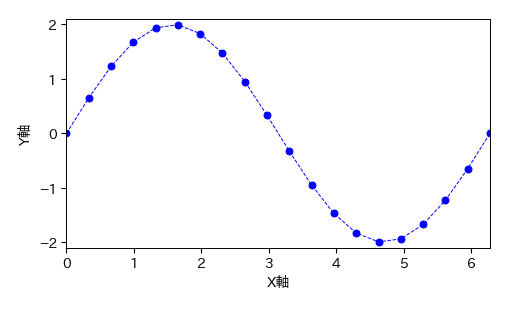

In [29]:
# FigureとAxesを生成する
fig, ax = plt.subplots(figsize=(5, 3))

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi, 20)
ax.plot(x, 2*np.sin(x), 'bo--');  # 青のoを点線で結ぶ

# Axesを装飾する
ax.set_xlim(0, 2*np.pi); ax.set_ylim(-2.1, 2.1)
ax.set_xlabel('X軸'); ax.set_ylabel('Y軸')

# Figureを保存する（相対パスを指定）
fig.savefig('./sin.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300);

#### 基本のプロット関数

Matplotlibの最も基本的なプロット関数が`pyplot.plot()`である．
Axesオブジェクトを`ax`として取得したい場合，`plot`関数は以下のように実行する：
```python
ax.plot(x, y, 'rx-', option)
```
`plot`関数の第3引数は色・マーカー・線種を同時指定することができる．
主要なoptionを以下にまとめる．

| オプション名 | 省略表記 | 内容 | 指定の仕方（例） | 
| ---- | ---- | ---- | ---- |
| color | c | 色 | 'k'(='black'), 'r'(='red'), 'b'(='blue') |
| linestyle | ls | 線種 | '-', '--', ':' , '-.', 'None' |
| marker | なし |マーカーの種類 | 'x', 'o', '^', '.', '+', 's', 'd' |
| markersize | ms | マーカーのサイズ | 数値 |
| markeredgecolor | mec | マーカーの境界の色 | 色名 |
| markerfacecolor | mfc | マーカーの塗りつぶしの色 | 色名 |
| linewidth | lw | 線の太さ | 数値 |
| alpha | なし | 透過度 | 0~1 |

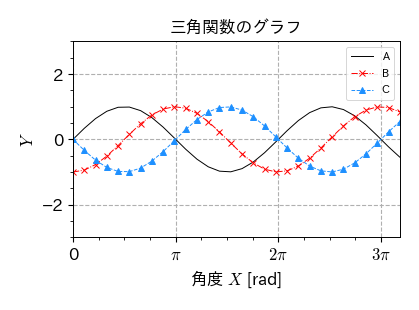

In [6]:
'''FigureとAxesの生成'''
fig, ax = plt.subplots(figsize=(5, 3))

'''Axesに対する描画'''
x = np.linspace(0, 10, 30)
ax.plot(x, np.sin(x), '-', label='A')
ax.plot(x, np.sin(x-np.pi/2), 'x-.', label='B')
ax.plot(x, np.sin(x-2*np.pi/2), '^--', label='C')

''' Axesの装飾 '''
# 座標軸の範囲の設定
ax.set_xlim(0, 10)
ax.set_ylim(-3, 3)

# アスペクト比
ax.set_aspect('equal')

# タイトル
ax.set_title('三角関数のグラフ', fontsize=12)

# 軸ラベル
ax.set_xlabel('角度 $X$ [rad]', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)

# 凡例
ax.legend(loc='best', frameon=True, fontsize=8, numpoints=1)

# 補助目盛りの表示
ax.minorticks_on()

# 目盛線の表示
ax.grid(axis='both', which='major', linestyle='--')

# 目盛りラベルを文字列に変更
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
ax.set_xticklabels(['0', '$\pi$', '$2\pi$', '$3\pi$'])

# 目盛りのラベルサイズ
ax.tick_params(axis='both', labelsize=12)

'''Figureの保存'''
fig.savefig('./multi_sin.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

#### ヒストグラム

Matplotlibで1次元ヒストグラムを描画するには`ax.hist()`を用いる：

```python
ax.hist(data, bins, option)
```
- 第１引数には数値データを与える．
- `bins`引数には，以下を指定できる：
  - `bins=n`とした場合，$ n $ 個の等間隔の階級に分ける．１つの階級の幅は `(最大値-最小値) / n` となる．
  - `bins=[0, 1, 2, 3]`とした場合，階級の境界は`[0, 1), [1, 2), [2, 3]`となる（最後だけ右端を含むことに注意）．

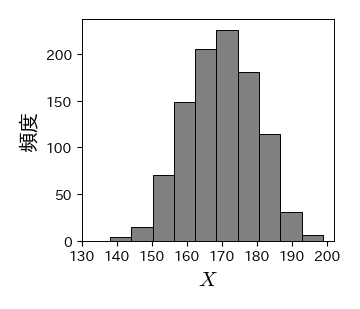

In [31]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, color='gray', edgecolor='k')  # 階級数10

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('頻度', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

In [33]:
# 度数分布表の作成
f, x = ret[0], ret[1]
df = pd.DataFrame(np.c_[x[:-1], x[1:], 0.5*(x[1:]+x[:-1]), f, f/len(data)],
                  columns=['最小', '最大', '階級値', '度数', '相対度数'])
df

,最小,最大,階級値,度数,相対度数
0,138.102972,144.180495,141.141733,4.0,0.004
1,144.180495,150.258017,147.219256,15.0,0.015
2,150.258017,156.335540,153.296779,70.0,0.070
3,156.335540,162.413063,159.374301,148.0,0.148
4,162.413063,168.490585,165.451824,205.0,0.205
5,168.490585,174.568108,171.529347,226.0,0.226
6,174.568108,180.645631,177.606869,181.0,0.181
7,180.645631,186.723153,183.684392,114.0,0.114
8,186.723153,192.800676,189.761915,31.0,0.031
9,192.800676,198.878199,195.839437,6.0,0.006


**ヒストグラムの装飾**

`ax.hist`メソッドにも，色やスタイルを変更するためのオプションが多数用意されている．
主要なオプションを以下にまとめる．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| histtype | ヒストグラムのスタイル | 'bar', 'step', 'stepfilled', 'barstacked' |
| color | 塗りつぶしの色 | 色名 |
| edgecolor | 枠線の色 | 色名 |
| linewidth | 枠線の太さ | 数値 |
| linestyle | 線種 | '-', '--', '-.', ':' |
| rwidth | バーの幅 | 数値（0~1） |
| align | バーの中央を階級のどこに合わせるか | 'left'（階級の左端）, 'mid'（階級の中央＝デフォルト）, 'right'（階級の右端） |
| density | Trueの場合は縦軸を相対度数に変更 | True/False |
| cumulative | Trueの場合は縦軸を累積度数に変更 | 1（下側累積）, 0, -1（上側累積） |

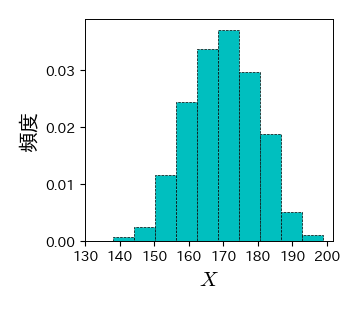

In [34]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

fig, ax = plt.subplots()
ret = ax.hist(data, 
              bins=10,
              # bins=[-4, -3, -2, -1, 0, 1, 2, 3, 4], # 階級の左端の値を指定する場合
              histtype='bar',  # ヒストグラムのスタイルを棒グラフに
              color='c',       # バーの色をシアンに
              edgecolor='k',   # バーの枠線の色を黒に
              linewidth=0.5,   # バーの枠線の太さを1に
              linestyle='--',  # 枠線を点線に
              density=True     # 縦軸を相対度数に
              )

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('頻度', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

### `scipy.stats`の基礎

Pythonには，科学技術計算に特化した `scipy` というライブラリが存在する．
確率分布に関する計算（例えば，正規分布に従う乱数の生成など）には，`numpy`を使用することもできるが，`scipy.stats`の方が機能が充実している．
ここでは，`scipy`の中で確率分布や乱数に関する機能をまとめた`sciy.stats`の基礎をまとめる．
`scipy`のその他の機能についてはその都度解説する．

まず，本講義では，`scipy`を`sp`という名前でインポートする：

In [12]:
import scipy as sp

`scipy`には，確率分布の種類別に様々なメソッドが用意されており，

```python
sp.stats.確率分布名.メソッド名
```

のように使用する．
例えば，標準正規分布（平均0，標準偏差1のNormal Distribution）に従うサイズ10の標本を生成するには以下のように`rvs`メソッドを用いる

In [13]:
sp.stats.norm.rvs(loc=0, scale=1, size=10)

array([ 0.14160215, -0.54994744,  1.13429327,  0.79154247, -0.03539083,
       -0.19502139, -1.03818828,  0.44388096,  0.96066003, -0.43036345])

**[主要な確率分布](https://docs.scipy.org/doc/scipy/reference/stats.html)**

| コマンド | 確率分布 |
| --- | --- |
| `sp.stats.bernoulli` | ベルヌーイ分布 |
| `sp.stats.binom` | 二項分布 |
| `sp.stats.poisson` | ポアソン分布 |
| `sp.stats.geom` | 幾何分布 |
| `sp.stats.norm` | 正規分布 |
| `sp.stats.expon` | 指数分布 |
| `sp.stats.gamma` | ガンマ分布 |

**主なメソッド**

| メソッド | 内容 | 備考 |
| --- | --- | --- |
| `rvs` | 対応する確率分布に従うデータを生成する |
| `pmf` | 確率質量関数を計算する | 離散型確率分布のみ |
| `pdf` | 確率密度関数を計算する | 連続型確率分布のみ |
| `cdf` | 累積分布関数を計算する | |
| `ppf` | パーセント点に対応する`x`の値を計算する | |

#### 例：ポアソン分布

In [26]:
# ポアソン分布に従うサイズ100の標本を生成
data = sp.stats.poisson.rvs(mu=3, size=1000)

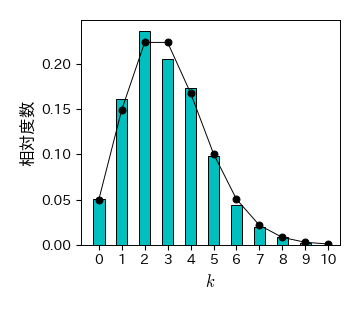

In [28]:
# ヒストグラムの階級の左端の値
k = np.arange(data.max()+2)

# ヒストグラムを描画する
fig, ax = plt.subplots()
ret = ax.hist(data, 
              bins=k,        # 階級の左端の値を指定
              align='left',  # バーの中央を階級の左端に合わせる
              density=1,     # 縦軸を相対度数に
              color='c',       
              edgecolor='k', 
              rwidth=0.5)

# 確率質量関数を描画する
fk = sp.stats.poisson.pmf(k, mu=3)
ax.plot(k, fk, 'k-o')

# 装飾
ax.set_xlabel('$k$', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)
ax.set_xticks(k);

# 保存
fig.savefig('./poisson.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)

#### 例：正規分布

In [23]:
# 標準正規分布に従うサイズ100の標本を生成
data = sp.stats.norm.rvs(size=100)

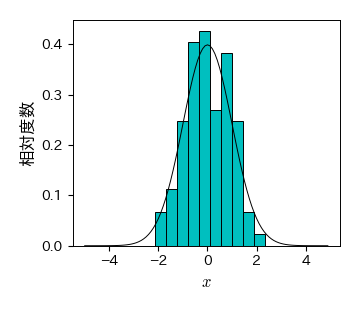

In [24]:
# ヒストグラムを描画する
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, density=1, color='c', edgecolor='k')  # 階級数10

# 確率密度関数を描画する
x = np.arange(-5, 5, 0.1)
fx = sp.stats.norm.pdf(x, loc=0, scale=1)
ax.plot(x, fx, 'k-')

# 装飾
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('相対度数', fontsize=12)

# 保存
fig.savefig('./normal.pdf', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300)